In [1]:
# imports
import json
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la
from pprint import pprint



In [3]:
# Reads a json file 
nodes=[]
edges_by_nodes=[]

def _read_jsonFile():
    file =input("Entre nom du fichier \t")
    
    with open(file, 'r') as json_data:
        print("File have been read")
        _dict = json.load(json_data)
    pprint(_dict)
    for i in range(len(_dict['nodes'])):
        nodes.append(_dict['nodes'][i])
    for j in range(len(_dict['edges_by_nodes'])):
        edges_by_nodes.append(_dict['edges_by_nodes'][j])


In [4]:
_read_jsonFile()

Entre nom du fichier 	graphe.json
File have been read
{'edges_by_nodes': [{'A': []},
                    {'B': ['C']},
                    {'C': ['B']},
                    {'D': ['A', 'B']},
                    {'E': ['F', 'B', 'D']},
                    {'F': ['E', 'B']},
                    {'G': ['E', 'B']},
                    {'H': ['E', 'B']},
                    {'I': ['E', 'B']},
                    {'L': ['E']},
                    {'M': ['E']}],
 'nodes': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M']}


In [5]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("this are the nodes")
print(nodes)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("this are the edges_by_nodes")
print(edges_by_nodes)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
this are the nodes
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
this are the edges_by_nodes
[{'A': []}, {'B': ['C']}, {'C': ['B']}, {'D': ['A', 'B']}, {'E': ['F', 'B', 'D']}, {'F': ['E', 'B']}, {'G': ['E', 'B']}, {'H': ['E', 'B']}, {'I': ['E', 'B']}, {'L': ['E']}, {'M': ['E']}]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [6]:
tuples_n_e = []

for i , j in zip(nodes,edges_by_nodes):
    for k in j[i]:
        tuples_n_e.append((i, k))

        
print(tuples_n_e)

[('B', 'C'), ('C', 'B'), ('D', 'A'), ('D', 'B'), ('E', 'F'), ('E', 'B'), ('E', 'D'), ('F', 'E'), ('F', 'B'), ('G', 'E'), ('G', 'B'), ('H', 'E'), ('H', 'B'), ('I', 'E'), ('I', 'B'), ('L', 'E'), ('M', 'E')]


In [7]:

# Use NetworkX to create an empty graph
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(tuples_n_e)

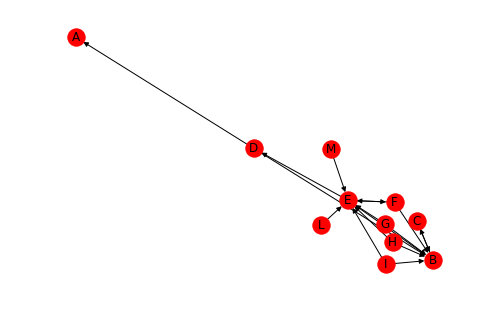

In [8]:
# Drawing the graph using matplotlib
nx.draw(G, with_labels=True)
plt.savefig("graphe.png")
plt.show()  # display

In [9]:
edges = []
for i, key in zip(edges_by_nodes, nodes):
    #if the page A has link to the page B we set 1; else 0
    items_freq = []
    for k in nodes:
        # We Append the frequency of the item 
        items_freq.append(i[key].count(k))
    #
    edges.append(items_freq)
    print("Matrix of nodes in { 1 , 0 }\n")
    print(edges)

Matrix of nodes in { 1 , 0 }

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
Matrix of nodes in { 1 , 0 }

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]
Matrix of nodes in { 1 , 0 }

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
Matrix of nodes in { 1 , 0 }

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
Matrix of nodes in { 1 , 0 }

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]]
Matrix of nodes in { 1 , 0 }

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]]
Matrix of nodes in { 1 , 0 }

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 

In [10]:
# we convert the matrix to numpy matrix with float type for values
edges = np.matrix(edges, dtype=float)
print("Matrix of nodes float values\n")
print(edges)
# her we calculate sum of items in each row and we set it in the same position of row
sout = edges.sum(axis=1)

# we divide the matrix by this vector and multiply it with 0.85 to get the probability of transaction using links=edges
edges_freq = np.divide(edges, sout, out=np.zeros_like(edges), where=sout != 0) * 0.85
print("Matrix of Probability\n")
print(edges_freq)
# n is the number of nodes
n = len(nodes)
print(" Number of nodes \n")
print("n = \t",n)

Matrix of nodes float values

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Matrix of Probability

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.85       0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.85       0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.425      0.425      0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.28333333 0.         0.28333333 0.         0.28333333
  0.      

In [11]:
# her we will set the probability of transaction using url
lien = np.zeros(edges.shape)
for i, j in zip(lien, range(n)):
    # we know if sout equals to 0 that mean this nodes has no links to other nodes so probability is 1/n
    if sout[j] == 0:
        np.place(i, i < 1000000000, 1/n)
    # else the probability is 0.15/n
    else:
        np.place(i, i < 1000000000, 0.15 / n)
print("lien \n")
print(lien)
# finally the probability of transaction between nodes it's sum of the two matrix above
Pr = edges_freq + lien

print('~~'*35)
print('nodes : \n', nodes)
print('~~'*35)
print('Matrice de Probabilité : \n', np.around(Pr, 3))
print('~~'*35)


lien 

[[0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.01363636 0.01363636 0.01363636 0.01363636 0.01363636 0.01363636
  0.01363636 0.01363636 0.01363636 0.01363636 0.01363636]
 [0.01363636 0.01363636 0.01363636 0.01363636 0.01363636 0.01363636
  0.01363636 0.01363636 0.01363636 0.01363636 0.01363636]
 [0.01363636 0.01363636 0.01363636 0.01363636 0.01363636 0.01363636
  0.01363636 0.01363636 0.01363636 0.01363636 0.01363636]
 [0.01363636 0.01363636 0.01363636 0.01363636 0.01363636 0.01363636
  0.01363636 0.01363636 0.01363636 0.01363636 0.01363636]
 [0.01363636 0.01363636 0.01363636 0.01363636 0.01363636 0.01363636
  0.01363636 0.01363636 0.01363636 0.01363636 0.01363636]
 [0.01363636 0.01363636 0.01363636 0.01363636 0.01363636 0.01363636
  0.01363636 0.01363636 0.01363636 0.01363636 0.01363636]
 [0.01363636 0.01363636 0.01363636 0.01363636 0.01363636 0.01363636
  0.01363636 0.01363636 0.01363636 0.013636

In [12]:
# R it's the nodes rank "R(l)"
R = []

# initialisation by 1/n
for i in range(n):
    R.append(1/n)

# her we convert it to numpy array
R = np.asarray(R)

# erreur initial 
ep = pow(10, -5)

# for counting number of iteration
p = 1
while ep >= pow(10, -6):
    # calculate  R(l+1)
    R1 = R * Pr
    # calculate ep of this iteration
    ep = la.norm(R1 - R)
    R = R1
    p += 1
    print("Iteration = \t",p)
    print(" R1 =\n",R1)
    

# finally displaying the result of ranking nodes.
print('~~'*35)
for i, j in zip(nodes, np.around(R, 3)[0]):
    print('PageRank pour (', i, ') : ', np.round(j*100, 3))
print("~~"*35)


Iteration = 	 2
 R1 =
 [[0.05929752 0.31687328 0.09793388 0.04641873 0.32975207 0.04641873
  0.02066116 0.02066116 0.02066116 0.02066116 0.02066116]]
Iteration = 	 3
 R1 =
 [[0.03794641 0.2606909  0.28756073 0.1116482  0.09941335 0.1116482
  0.01821844 0.01821844 0.01821844 0.01821844 0.01821844]]
Iteration = 	 4
 R1 =
 [[0.06401907 0.40729181 0.23815585 0.0447357  0.11821894 0.0447357
  0.01656859 0.01656859 0.01656859 0.01656859 0.01656859]]
Iteration = 	 5
 R1 =
 [[0.03759596 0.31366142 0.36478133 0.05207866 0.08688751 0.05207866
  0.01858329 0.01858329 0.01858329 0.01858329 0.01858329]]
Iteration = 	 6
 R1 =
 [[0.03867494 0.41918432 0.28315372 0.04115963 0.09396023 0.04115963
  0.01654151 0.01654151 0.01654151 0.01654151 0.01654151]]
Iteration = 	 7
 R1 =
 [[0.03411773 0.34000371 0.37293155 0.04324695 0.08332871 0.04324695
  0.01662488 0.01662488 0.01662488 0.01662488 0.01662488]]
Iteration = 	 8
 R1 =
 [[0.03465269 0.41483098 0.30527589 0.03988253 0.08411171 0.03988253
  0.0162727

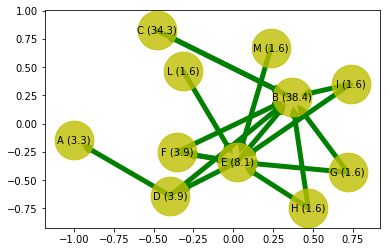

In [25]:
nodes_lables = {}
for i, j in zip(nodes, np.around(R, 3)[0]): 
    nodes_lables[i] = i+' (' +str(np.round(j*100, 3))+')'
    
pos=nx.spring_layout(G, k=1, iterations=30)
nx.draw_networkx_nodes(G,pos,nodelist=nodes,node_color='y',node_size=1500,alpha=0.8)
nx.draw_networkx_edges(G,pos,width=0.2,alpha=0.5)
nx.draw_networkx_edges(G,pos,edgelist=tuples_n_e,width=5,alpha=1.0,edge_color='g')

nx.draw_networkx_labels(G,pos,labels=nodes_lables,font_size=10)
plt.savefig("graphe_final.png")